In [189]:
import numpy as np
import pandas as pd
import ee
import requests
import os
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
from rasterio.mask import mask
# Initialize the Earth Engine API
ee.Initialize(project='ts-rishimnb')


<Axes: >

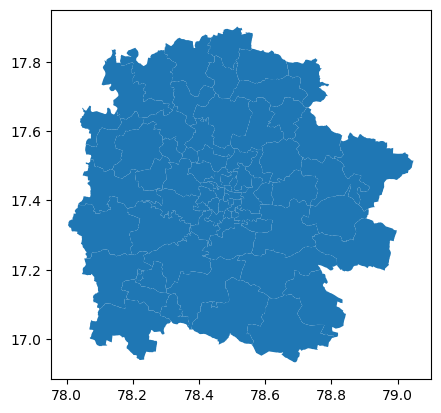

In [190]:
def get_landsat(start_date,end_date, file_name, bbox):
    bbox=ee.Geometry.Rectangle(bbox)
    image_collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
    .filterBounds(bbox) \
    .filterDate(start_date,end_date) \

    img =image_collection.mean()
    url = img.getDownloadUrl({
        'bands': [
        "SR_B5","SR_B6"],
        'region': bbox,
        'scale': 100,
        'format': 'GEO_TIFF'
    })
    response = requests.get(url)
    with open(file_name, 'wb') as fd:
        fd.write(response.content)

shapefile_path = r'C:\Users\rishi\ml_projects\climate\hmda_boundary\hmda_boundary.shp'
gdf = gpd.read_file(shapefile_path)
gdf.plot()

In [191]:
bbox=gdf.total_bounds
bbox=bbox.tolist()

In [192]:
bbox

[78.00405825700005, 16.932643511000038, 79.04971835800006, 17.901507061000075]

In [ ]:
start_date="2016-12-01"
end_date="2016-12-31"
file_name=r"C:\Users\rishi\ml_projects\climate\ndbi\dec_2016_100.tif"
get_landsat(start_date=start_date,end_date=end_date,file_name=file_name,bbox=bbox)

In [203]:
for year in range(2014,2024):
    start_date=f"{year}-12-01"
    end_date=f"{year}-12-31"
    file_name=fr"C:\Users\rishi\ml_projects\climate\ndbi\dec_{year}_100.tif"
    get_landsat(start_date=start_date,end_date=end_date,file_name=file_name,bbox=bbox)

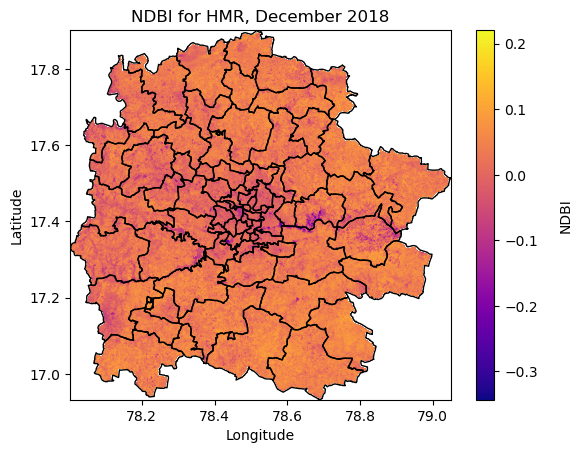

In [199]:
src = rio.open(r"C:\Users\rishi\ml_projects\climate\ndbi\dec_2015_100.tif")

# Mask both bands using gdf geometry
masked, masked_transform = mask(src, gdf.geometry, crop=True, nodata=np.nan)

# masked[0] = nir, masked[1] = swir
nir = masked[0]
swir = masked[1]

# Compute NDBI on masked data
ndbi = (swir - nir) / (swir + nir)

# Plot
fig, ax = plt.subplots()
show(ndbi, ax=ax, transform=masked_transform, cmap='plasma')
cbar = fig.colorbar(ax.images[0], ax=ax, orientation='vertical')
cbar.set_label('NDBI', rotation=90, labelpad=15)
gdf.boundary.plot(ax=ax, edgecolor='black',linewidth=1)
ax.set_title("NDBI for HMR, December 2018")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


In [200]:
print(np.nanmax(ndbi),np.nanmin(ndbi),np.nanmean(ndbi))
count = np.sum(ndbi > 0.1)
print(count)

0.22073160210508153 -0.34312512883941454 0.0300324949221354
5101


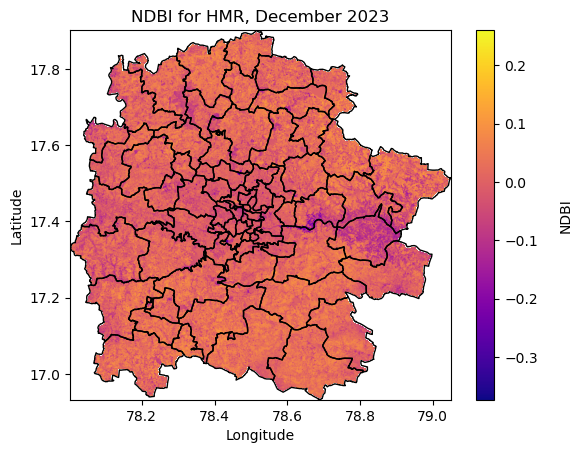

In [201]:
src = rio.open(r"C:\Users\rishi\ml_projects\climate\ndbi\dec_2023_100.tif")

# Mask both bands using gdf geometry
masked, masked_transform = mask(src, gdf.geometry, crop=True, nodata=np.nan)

# masked[0] = nir, masked[1] = swir
nir = masked[0]
swir = masked[1]

# Compute NDBI on masked data
ndbi = (swir - nir) / (swir + nir)

# Plot
fig, ax = plt.subplots()
show(ndbi, ax=ax, transform=masked_transform, cmap='plasma')
cbar = fig.colorbar(ax.images[0], ax=ax, orientation='vertical')
cbar.set_label('NDBI', rotation=90, labelpad=15)
gdf.boundary.plot(ax=ax, edgecolor='black',linewidth=1)
ax.set_title("NDBI for HMR, December 2023")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


In [202]:
print(np.nanmax(ndbi),np.nanmin(ndbi),np.nanmean(ndbi))
count = np.sum(ndbi > 0.1)
print(count)

0.2602344107241703 -0.3732171596647983 0.009868655517399986
12184


In [217]:
min_v=[]
max_v=[]
median_v=[]
urb=[]
for year in range(2014,2024):
    file_name=fr"C:\Users\rishi\ml_projects\climate\ndbi\dec_{year}_100.tif"
    src=rio.open(file_name)
    masked, masked_transform = mask(src, gdf.geometry, crop=True, nodata=np.nan)

    # masked[0] = nir, masked[1] = swir
    nir = masked[0]
    swir = masked[1]

    # Compute NDBI on masked data
    ndbi = (swir - nir) / (swir + nir)
    min_v.append(np.nanmin(ndbi))
    max_v.append(np.nanmax(ndbi))
    median_v.append(np.nanmedian(ndbi))
    urb.append(np.sum(ndbi>0.10))


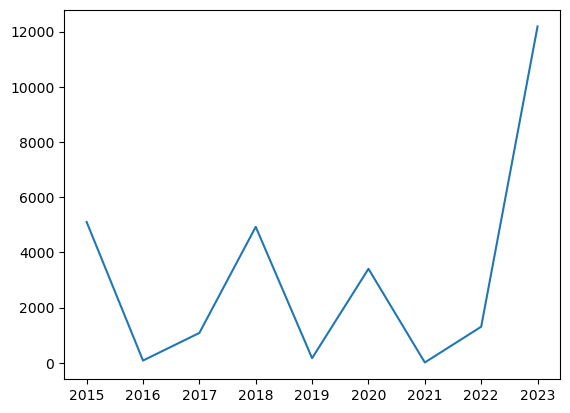

In [218]:
plt.plot(np.arange(2015,2024),urb[1:])